### **Importing the libraries required for this project.**

In [198]:
# The Pandas library will be used for preprocessing and organizing text data into a data frame for further analysis.

import pandas as pd

In [199]:
# Numpy will be used for performing numerical computations on textual data converted into numerical vectors.

import numpy as np

In [200]:
# Matplotlib will be used for data visualisation.

import matplotlib.pyplot as plt


In [201]:
# Seaborn will be used for data visualisation.

import seaborn as sns




---



### **Reading in the data**

In [202]:
data_df = pd.read_csv("/content/drive/MyDrive/Colab/5 Renewable Energy/owid-energy-data.csv")



---



### **Inspecting the data**

In [203]:
# Viewing the first 10 rows of the dataset for a brief overview of the structure and composition of the DataFrame.

data_df.head(10)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,AFG,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,AFG,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,1905,AFG,5128808.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,1906,AFG,5195038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,1907,AFG,5262120.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,1908,AFG,5330065.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,1909,AFG,5467828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Creating a filtered dataframe showing only data from South Africa**
As this study is focussed on renewable energy generation in South Africa, I can reduce the size of the dataset and optimise my workflow by filtering the rows of data applicable to other countries.


In [204]:
# Filtering rows where 'country' column contains 'South Africa'

df = data_df[data_df['country'] == 'South Africa']


In [205]:
# Retrieving the dimensions of a dataframe. After filtering out the irrelevant rows, I now have 122 rows remaining of the original 21890.
df.shape

(122, 129)



---



### **Inspecting the filtered dataset**

In [206]:
# Identifying the columns in the dataframe.
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)

In [207]:
# Identifying the types of data in each column.

df.dtypes

country                    object
year                        int64
iso_code                   object
population                float64
gdp                       float64
                           ...   
wind_elec_per_capita      float64
wind_electricity          float64
wind_energy_per_capita    float64
wind_share_elec           float64
wind_share_energy         float64
Length: 129, dtype: object

In [208]:
# A summary of the dataframe, including the number of non-null values and the data type of each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 17610 to 17731
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 123.9+ KB


In [ ]:
# Calculating the percentage of missing values in each column, and printing the column name and percentage of missing values in that column.

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))

In [210]:
# Returning the sum of missing values in each column of the dataframe.

df.isnull().sum()


country                    0
year                       0
iso_code                   0
population                 0
gdp                       53
                          ..
wind_elec_per_capita      65
wind_electricity          65
wind_energy_per_capita    65
wind_share_elec           85
wind_share_energy         65
Length: 129, dtype: int64



---



### **Data cleaning**

In [233]:
# Dropping the rows which correspond with the years between 1900 and 1984, where no data was tracked.

df.drop(df.loc[df['year'] <= 1985].index, inplace=True)

In [212]:
# Dropping the redundant columns.
columns_to_drop = ['country', 'iso_code', 'population', 'gdp']
df = df.drop(columns=columns_to_drop)

In [213]:
# Retrieving the dimensions of a dataframe to verify that 4 columns have been removed. 125 columns remaining of the original 129.
df.shape

(36, 125)

In [215]:
# The dataset contains percentage values, which will skew the analysis.
# Dropping columns that contain percentage values.

df = df.filter(regex='^(?!.*(_change_pct|_change_twh|_per_capita|_share_elec|_share_energy)).*$')


In [216]:
# Identifying the remaining columns in the dataframe.
df.columns

Index(['year', 'biofuel_consumption', 'biofuel_electricity',
       'carbon_intensity_elec', 'coal_consumption', 'coal_electricity',
       'coal_production', 'electricity_demand', 'electricity_generation',
       'energy_per_gdp', 'fossil_electricity', 'fossil_fuel_consumption',
       'gas_consumption', 'gas_electricity', 'gas_production',
       'greenhouse_gas_emissions', 'hydro_consumption', 'hydro_electricity',
       'low_carbon_consumption', 'low_carbon_electricity', 'net_elec_imports',
       'net_elec_imports_share_demand', 'nuclear_consumption',
       'nuclear_electricity', 'oil_consumption', 'oil_electricity',
       'oil_production', 'other_renewable_consumption',
       'other_renewable_electricity',
       'other_renewable_exc_biofuel_electricity', 'per_capita_electricity',
       'primary_energy_consumption', 'renewables_consumption',
       'renewables_electricity', 'solar_consumption', 'solar_electricity',
       'wind_consumption', 'wind_electricity'],
      dtype='

In [217]:
# Viewing the first 10 rows of the dataset for a brief overview of the structure and composition of the DataFrame.

df.head(10)

,year,biofuel_consumption,biofuel_electricity,carbon_intensity_elec,coal_consumption,coal_electricity,coal_production,electricity_demand,electricity_generation,energy_per_gdp,...,other_renewable_electricity,other_renewable_exc_biofuel_electricity,per_capita_electricity,primary_energy_consumption,renewables_consumption,renewables_electricity,solar_consumption,solar_electricity,wind_consumption,wind_electricity
17696,1986,NaN,NaN,NaN,735.666,135.988,1183.209,NaN,148.241,4.256,...,0.0,NaN,4250.292,931.701,4.799,1.623,0.0,0.0,0.0,0.0
17697,1987,NaN,NaN,NaN,748.573,142.773,1179.402,NaN,152.373,4.238,...,0.0,NaN,4218.600,946.451,4.781,1.617,0.0,0.0,0.0,0.0
17698,1988,NaN,NaN,NaN,809.927,143.032,1211.745,NaN,158.141,4.483,...,0.0,NaN,4229.065,1042.300,9.350,3.162,0.0,0.0,0.0,0.0
17699,1989,NaN,NaN,NaN,755.879,148.462,1175.548,NaN,163.359,4.195,...,0.0,NaN,4224.581,995.722,8.158,2.759,0.0,0.0,0.0,0.0
17700,1990,NaN,NaN,NaN,782.898,155.926,1164.732,NaN,167.226,4.379,...,0.0,NaN,4193.485,1029.669,2.987,1.010,0.0,0.0,0.0,0.0
17701,1991,NaN,NaN,NaN,768.753,155.388,1188.167,NaN,168.316,4.310,...,0.0,NaN,4114.203,1022.248,5.855,1.980,0.0,0.0,0.0,0.0
17702,1992,NaN,NaN,NaN,771.684,156.717,1216.525,NaN,168.090,4.342,...,0.0,NaN,4025.071,1027.038,2.224,0.752,0.0,0.0,0.0,0.0
17703,1993,NaN,NaN,NaN,774.729,165.960,1243.512,NaN,174.706,4.201,...,0.0,NaN,4108.270,1025.258,0.432,0.146,0.0,0.0,0.0,0.0
17704,1994,NaN,NaN,NaN,799.630,169.402,1292.417,NaN,181.690,4.165,...,0.0,NaN,4199.179,1069.309,3.176,1.074,0.0,0.0,0.0,0.0
17705,1995,NaN,NaN,NaN,829.713,173.551,1359.760,NaN,186.655,4.142,...,0.0,NaN,4243.501,1117.516,1.564,0.529,0.0,0.0,0.0,0.0


In [ ]:
# Replacing all NaN values with zero
df = df.fillna(0)

# Printing the DataFrame with NaN values replaced
print(df)



---



### **Summary statistics on key Category Variables**
Generating summary statistics each variable, providing insights into the central tendency, spread, and distribution of the data.

In [219]:
df.describe()

,year,biofuel_consumption,biofuel_electricity,carbon_intensity_elec,coal_consumption,coal_electricity,coal_production,electricity_demand,electricity_generation,energy_per_gdp,...,other_renewable_electricity,other_renewable_exc_biofuel_electricity,per_capita_electricity,primary_energy_consumption,renewables_consumption,renewables_electricity,solar_consumption,solar_electricity,wind_consumption,wind_electricity
count,36.000000,36.0,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.0,36.000000,36.000000,36.000000,36.00000,36.000000,36.000000,36.000000,36.000000
mean,2003.500000,0.0,0.242222,462.802889,916.562750,192.505417,1487.345250,138.383889,209.491306,3.007000,...,0.259833,0.0,4339.206250,1254.481583,11.251389,3.62300,3.059556,0.873333,3.141861,1.105278
std,10.535654,0.0,0.197688,374.659160,113.552941,27.899755,189.371961,112.418639,30.733834,1.217946,...,0.182569,0.0,276.821216,182.019541,12.829548,4.11841,6.468073,1.810264,6.517362,2.343108
min,1986.000000,0.0,0.000000,0.000000,735.666000,135.988000,1164.732000,0.000000,148.241000,0.000000,...,0.000000,0.0,3758.066000,931.701000,0.432000,0.14600,0.000000,0.000000,0.000000,0.000000
25%,1994.750000,0.0,0.000000,0.000000,823.930250,172.513750,1342.924250,0.000000,185.413750,2.277500,...,0.000000,0.0,4177.266750,1105.464250,4.382250,1.36675,0.000000,0.000000,0.000000,0.000000
50%,2003.500000,0.0,0.370000,737.944500,925.615000,194.494500,1554.680000,216.425000,220.095000,3.134500,...,0.370000,0.0,4246.896500,1278.760500,5.545000,1.84300,0.042500,0.020000,0.025500,0.010000
75%,2012.250000,0.0,0.402500,766.818500,1027.441000,214.385000,1657.346250,231.535000,236.570000,4.147750,...,0.402500,0.0,4533.866750,1425.077250,9.742250,3.19150,0.342500,0.035000,0.101250,0.040000
max,2021.000000,0.0,0.450000,774.894000,1091.169000,231.740000,1721.115000,243.660000,246.810000,4.483000,...,0.450000,0.0,4936.585000,1489.739000,47.138000,16.88000,21.776000,6.650000,21.428000,8.360000




---



### **Exploratory Data Analysis: Visualisations**


#### **Energy generation over time**


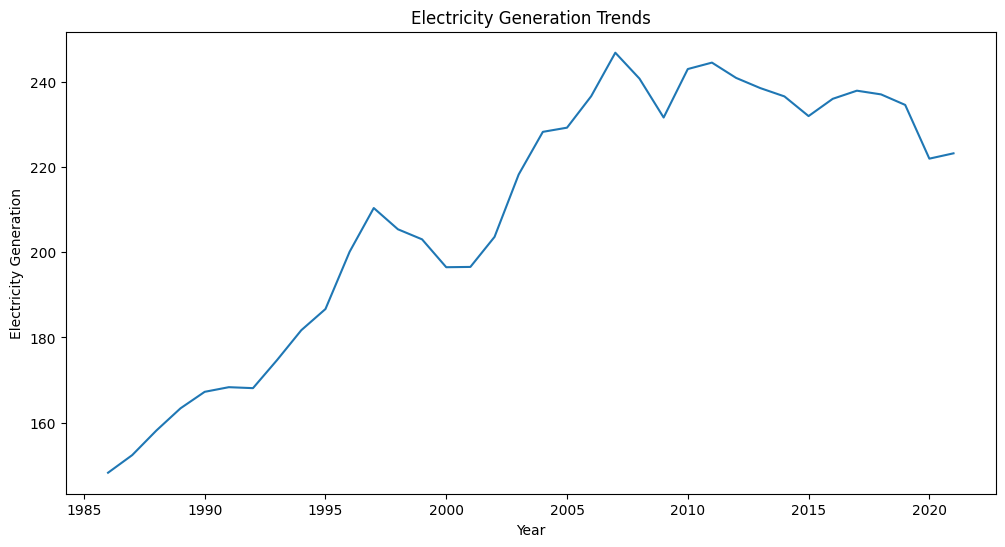

In [235]:
# Plotting electricity generation trends over time
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['electricity_generation'])
plt.xlabel('Year')
plt.ylabel('Electricity Generation')
plt.title('Electricity Generation Trends')
plt.show()


#### **Energy demand vs Energy Generation**


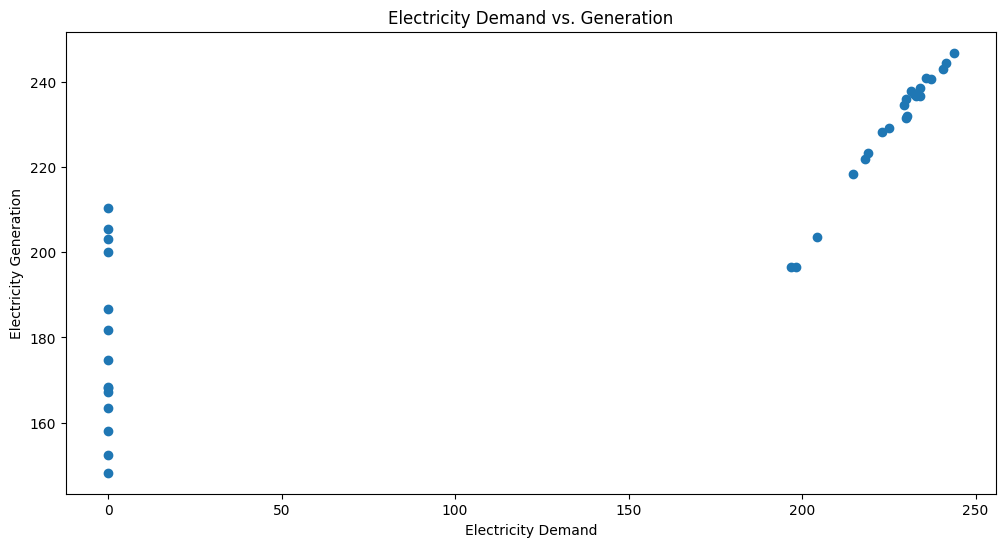

In [236]:
# Plotting electricity demand vs. electricity generation using a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['electricity_demand'], df['electricity_generation'])
plt.xlabel('Electricity Demand')
plt.ylabel('Electricity Generation')
plt.title('Electricity Demand vs. Generation')
plt.show()


#### **Energy generation per source**


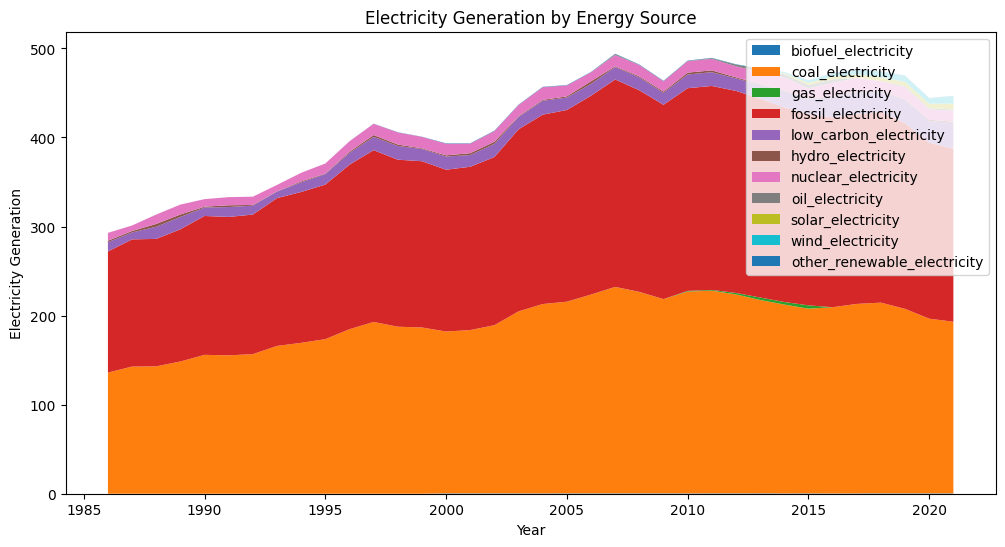

In [237]:
# Selecting columns for stacked area plot
energy_sources = ['biofuel_electricity', 'coal_electricity', 'gas_electricity', 'fossil_electricity', 'low_carbon_electricity', 'hydro_electricity', 'nuclear_electricity', 'oil_electricity', 'solar_electricity', 'wind_electricity', 'other_renewable_electricity']

# Plotting stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(df['year'], [df[column] for column in energy_sources], labels=energy_sources)
plt.xlabel('Year')
plt.ylabel('Electricity Generation')
plt.title('Electricity Generation by Energy Source')
plt.legend()
plt.show()


#### **Energy consumption per category**


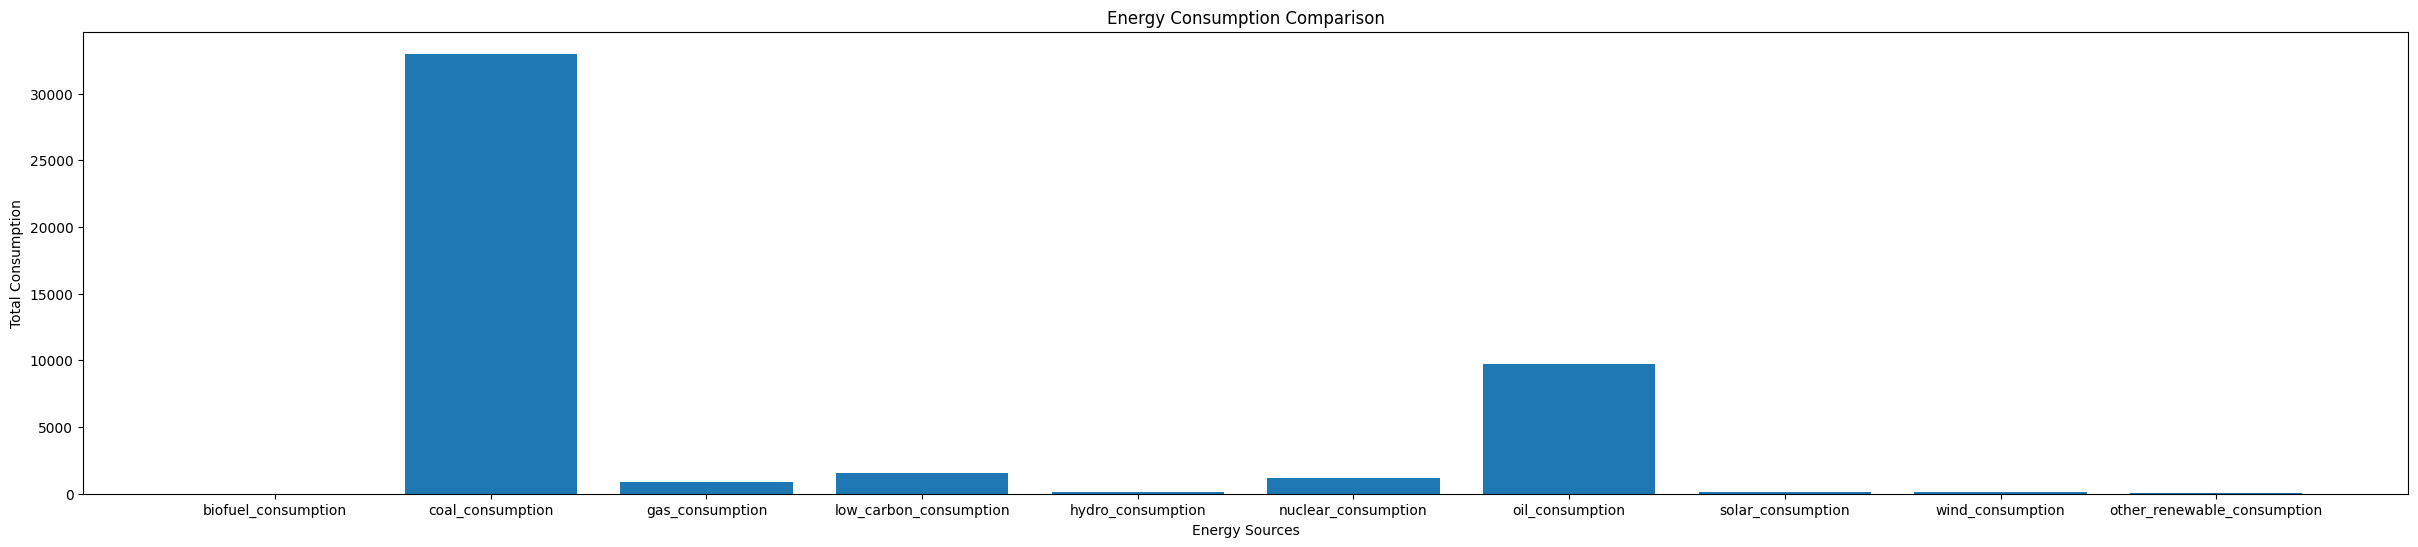

In [239]:
# Plotting energy consumption comparison using a bar plot
energy_sources = ['biofuel_consumption', 'coal_consumption', 'gas_consumption', 'low_carbon_consumption', 'hydro_consumption', 'nuclear_consumption', 'oil_consumption', 'solar_consumption', 'wind_consumption', 'other_renewable_consumption']
consumption_values = [df[column].sum() for column in energy_sources]

plt.figure(figsize=(30, 6))
plt.bar(energy_sources, consumption_values)
plt.xlabel('Energy Sources')
plt.ylabel('Total Consumption')
plt.title('Energy Consumption Comparison')
plt.show()




---



### **Histograms**


#### **Histogram: Distribution of electricity demand**


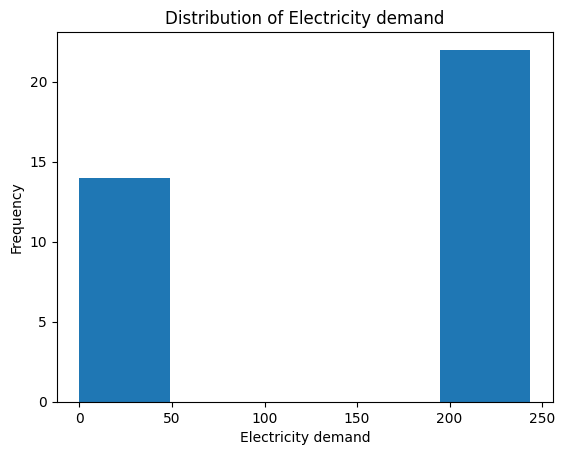

In [225]:
# Plot histogram of electricity demand
plt.hist(df['electricity_demand'], bins=5)
plt.xlabel('Electricity demand')
plt.ylabel('Frequency')
plt.title('Distribution of Electricity demand')
plt.show()


#### **Histogram: Distribution of electricity generation**


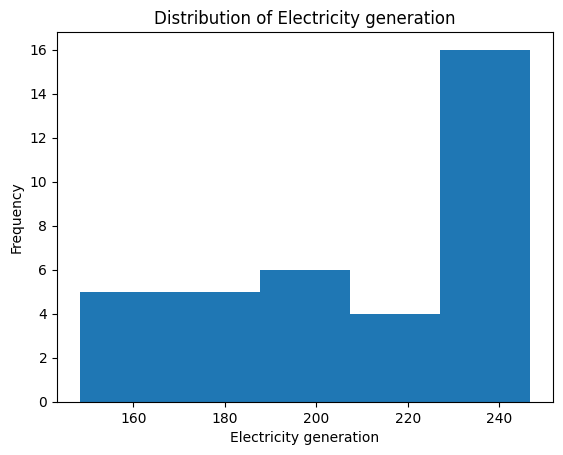

In [226]:
# Plot histogram of electricity generation
plt.hist(df['electricity_generation'], bins=5)
plt.xlabel('Electricity generation')
plt.ylabel('Frequency')
plt.title('Distribution of Electricity generation')
plt.show()


#### **Histogram: Distribution of greenhouse gas emissions**


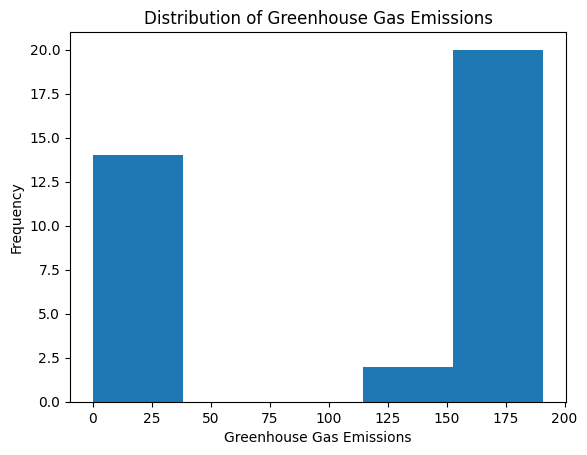

In [227]:
# Plot histogram of greenhouse gas emissions
plt.hist(df['greenhouse_gas_emissions'], bins=5)
plt.xlabel('Greenhouse Gas Emissions')
plt.ylabel('Frequency')
plt.title('Distribution of Greenhouse Gas Emissions')
plt.show()


### **Correlation Analysis**


#### **Correlation heatmap: Generation, demand, gas emissions and energy per GDP**

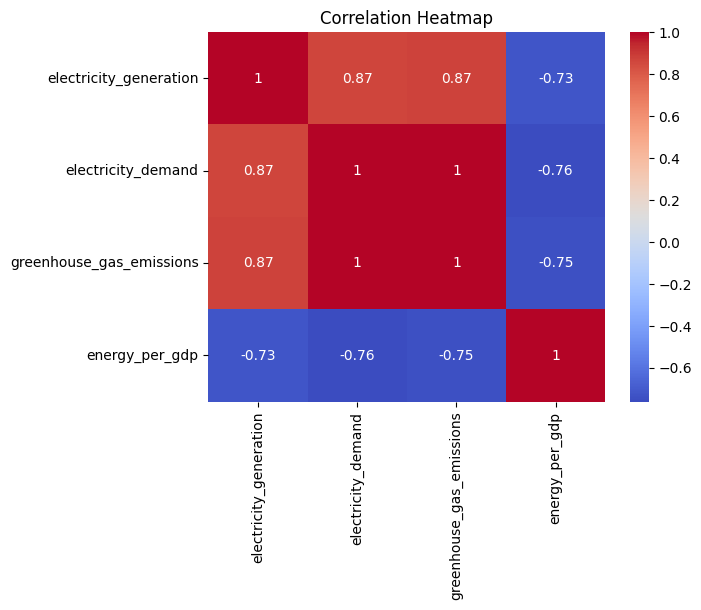

In [228]:
# Select relevant columns for correlation heatmap
correlation = ['electricity_generation', 'electricity_demand', 'greenhouse_gas_emissions', 'energy_per_gdp']

# Compute correlation matrix
corr_matrix = df[correlation].corr()

# Plot correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



---



#### **Correlation matrix: Generation, demand, gas emissions and energy per GDP**

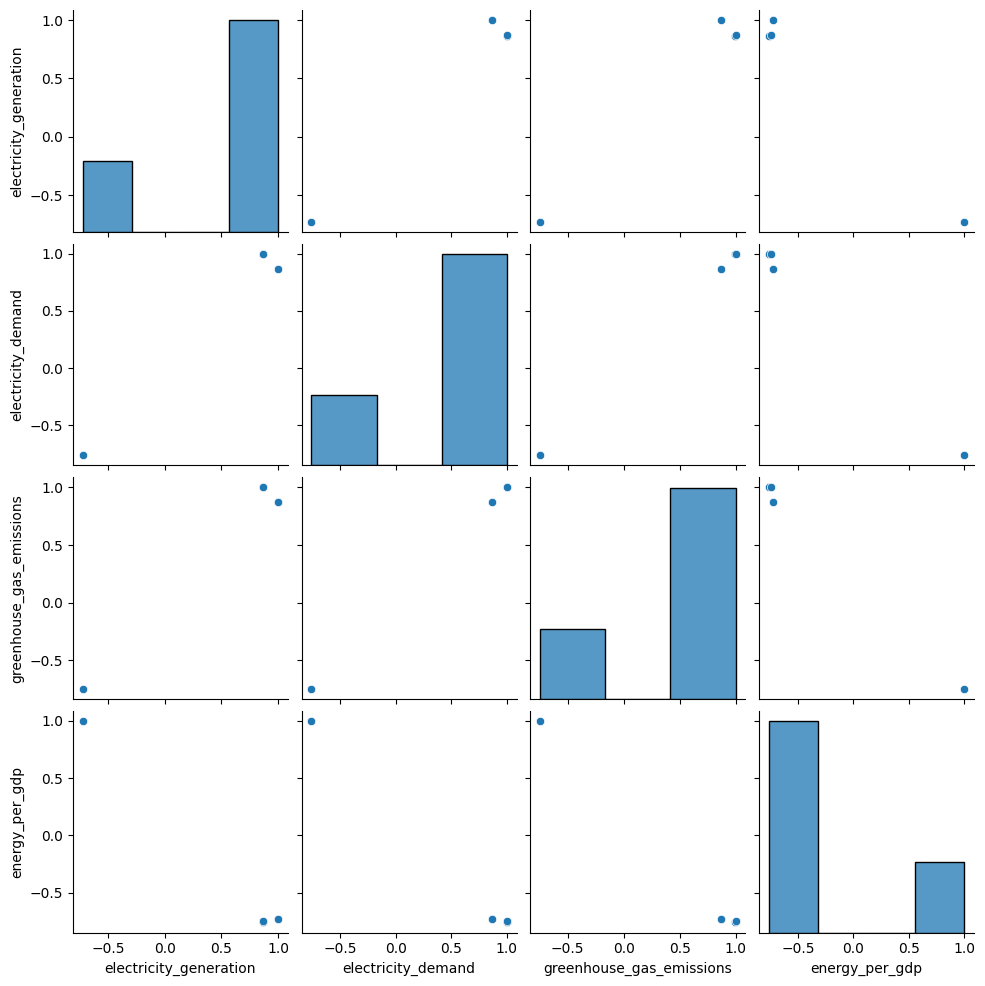

In [229]:
# Plot a pairwise scatterplot of all of the variables
sns.pairplot(corr_matrix)

# Show the plot
plt.show()


### **Correlation Co-efficient Matrix: Generation, demand, gas emissions and energy per GDP**

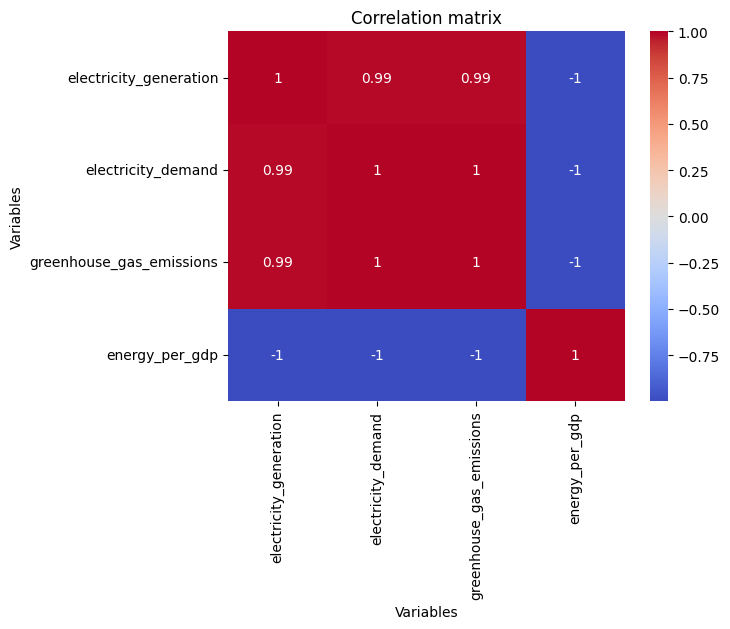

In [232]:
# Calculate the correlation coefficient matrix
correlation_matrix = corr_matrix.corr(method='pearson')

# Visualising the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title('Correlation matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')

plt.show()




---

